In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import numpy as np
(train_data, train_labels),_=imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1.
    return results

train_data = vectorize_sequences(train_data)


In [11]:
# 원본 모델
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original_model = model.fit(
    train_data, train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4
)

Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5289 - accuracy: 0.7821 - val_loss: 0.4001 - val_accuracy: 0.8703
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3185 - accuracy: 0.9011 - val_loss: 0.3107 - val_accuracy: 0.8839
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2281 - accuracy: 0.9277 - val_loss: 0.2908 - val_accuracy: 0.8819
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1786 - accuracy: 0.9425 - val_loss: 0.2816 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1458 - accuracy: 0.9544 - val_loss: 0.2821 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1207 - accuracy: 0.9637 - val_loss: 0.2916 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0993 - accuracy: 0.9703 - val_loss: 0.3093 - val_accuracy: 0.8853
Epoch 8/20
30

In [12]:
# 작은 용량의 모델
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4
)

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6444 - accuracy: 0.6598 - val_loss: 0.6087 - val_accuracy: 0.6956
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.5726 - accuracy: 0.7864 - val_loss: 0.5459 - val_accuracy: 0.8366
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4935 - accuracy: 0.8666 - val_loss: 0.4673 - val_accuracy: 0.8671
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3992 - accuracy: 0.9017 - val_loss: 0.3929 - val_accuracy: 0.8702
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3171 - accuracy: 0.9195 - val_loss: 0.3360 - val_accuracy: 0.8849
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2618 - accuracy: 0.9303 - val_loss: 0.3074 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2236 - accuracy: 0.9386 - val_loss: 0.2878 - val_accuracy: 0.8916
Epoch 8/20
30

In [13]:
# 더 큰 용량의 모델
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_lager_model = model.fit(
    train_data, train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4
)

Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.5955 - accuracy: 0.7739 - val_loss: 0.2880 - val_accuracy: 0.8855
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2608 - accuracy: 0.8943 - val_loss: 0.3135 - val_accuracy: 0.8643
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1467 - accuracy: 0.9445 - val_loss: 0.3017 - val_accuracy: 0.8887
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0986 - accuracy: 0.9689 - val_loss: 0.3639 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0144 - accuracy: 0.9968 - val_loss: 0.4928 - val_accuracy: 0.8857
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1742 - accuracy: 0.9769 - val_loss: 0.3623 - val_accuracy: 0.8840
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.5360 - val_accuracy: 0.8843
Epoch 8/20
30

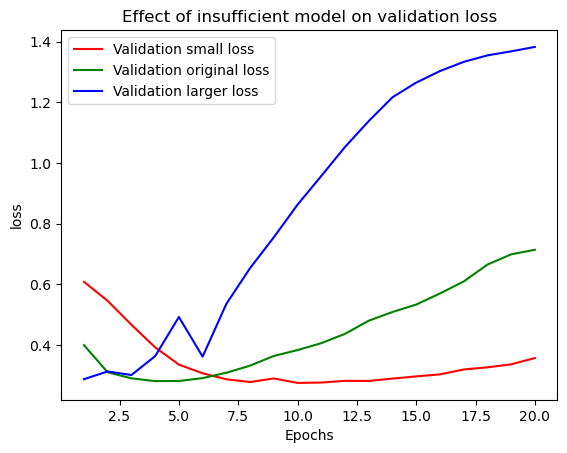

In [14]:
import matplotlib.pyplot as plt
val_small_loss = history_smaller_model.history["val_loss"]
val_original_loss = history_original_model.history["val_loss"]
val_larger_loss = history_lager_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_small_loss, "r-",
         label="Validation small loss")
plt.plot(epochs, val_original_loss, "g-",
         label="Validation original loss")
plt.plot(epochs, val_larger_loss, "b-",
         label="Validation larger loss")
plt.title("Effect of insufficient model on validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [15]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002),activation="relu"),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002),activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4
)

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5885 - accuracy: 0.7777 - val_loss: 0.4534 - val_accuracy: 0.8702
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3872 - accuracy: 0.9005 - val_loss: 0.3866 - val_accuracy: 0.8821
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3239 - accuracy: 0.9159 - val_loss: 0.4245 - val_accuracy: 0.8530
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2926 - accuracy: 0.9259 - val_loss: 0.3577 - val_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2737 - accuracy: 0.9343 - val_loss: 0.3551 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2569 - accuracy: 0.9408 - val_loss: 0.3656 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2531 - accuracy: 0.9425 - val_loss: 0.3908 - val_accuracy: 0.8727
Epoch 8/20
30

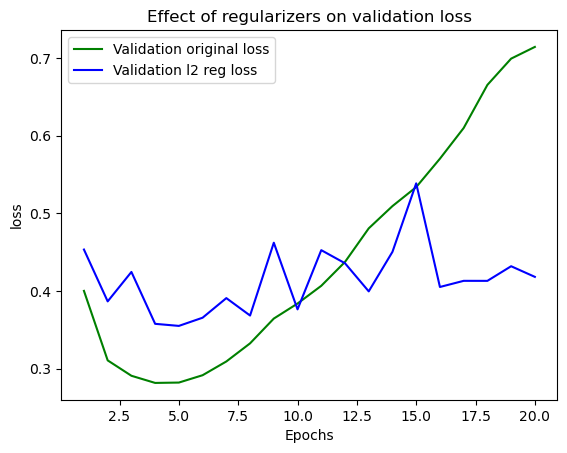

In [16]:
val_original_loss = history_original_model.history["val_loss"]
val_l2_loss = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_original_loss, "g-",
         label="Validation original loss")
plt.plot(epochs, val_l2_loss, "b-",
         label="Validation l2 reg loss")
plt.title("Effect of regularizers on validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [8]:
regularizers.l1_l2(l1=0.001, l2=0.001) # L1규제와 L2규제 병행

In [9]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4
)

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.6405 - accuracy: 0.6241 - val_loss: 0.5368 - val_accuracy: 0.8453
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.5255 - accuracy: 0.7571 - val_loss: 0.4145 - val_accuracy: 0.8742
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4378 - accuracy: 0.8179 - val_loss: 0.3449 - val_accuracy: 0.8802
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3729 - accuracy: 0.8499 - val_loss: 0.3054 - val_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3182 - accuracy: 0.8837 - val_loss: 0.2875 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2753 - accuracy: 0.9023 - val_loss: 0.2869 - val_accuracy: 0.8834
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2420 - accuracy: 0.9182 - val_loss: 0.2771 - val_accuracy: 0.8913
Epoch 8/20
30

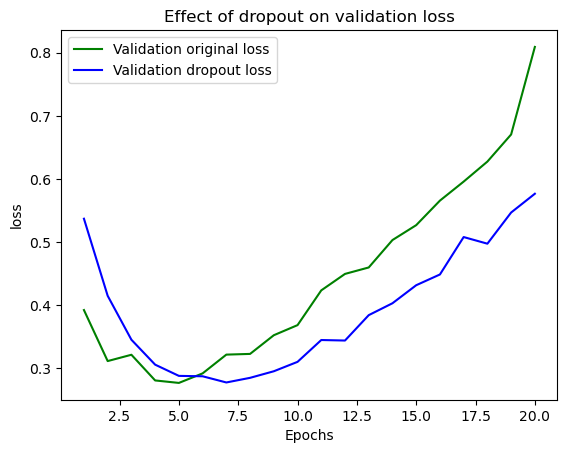

In [10]:
val_original_loss = history_original_model.history["val_loss"]
val_dropout = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_original_loss, "g-",
         label="Validation original loss")
plt.plot(epochs, val_dropout, "b-",
         label="Validation dropout loss")
plt.title("Effect of dropout on validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()